<a href="https://colab.research.google.com/github/yaminibansal/COVID-19-viz/blob/master/COVID_19_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing COVID-19 data
As the COVID-19 pandemic takes hold, it is important that we use all the tools at our disposal to better understand what is coming... and one way to do that is to look at all the data we are getting from various parts of the world

This is a crude notebook that allows you to explore some of this data using basic python tools. The data is imported from the fantastic repository maintained by JHU CSSE https://github.com/CSSEGISandData/COVID-19. If you would like more flexibility in visualizing the data from the pandemic, this might help! 

This notebook is not intended to provide any commentary/insight into the data, merely to allow you to plot it as you wish. Hope this helps!


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
import matplotlib.dates as mdates

In [0]:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

confirmed_df = pd.read_csv(confirmed_url)
deaths_df = pd.read_csv(deaths_url)
recovered_df = pd.read_csv(recovered_url)

In [3]:
dates = confirmed_df.columns[4:].values
dates_dt = [datetime.strptime(date, '%m/%d/%y') for date in dates]
start_date = dates_dt[0]
end_date = dates_dt[-1]
print(f'Available dates = {start_date.strftime("%d %b, %Y")} to {end_date.strftime("%d %b, %Y")}')

Available dates = 22 Jan, 2020 to 12 Mar, 2020


In [0]:
locations_list = confirmed_df['Province/State'].values
locations_list = np.sort([x for x in locations_list if str(x) != 'nan']) #filter NaN

# Plot data for a given location and date window 

In [5]:
import ipywidgets as widgets
location_picker = widgets.Dropdown(options=locations_list)
location_picker

/usr/local/lib/python3.6/dist-packages/traitlets/traitlets.py:567: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  silent = bool(old_value == new_value)


Dropdown(options=('Adams, IN', 'Alachua, FL', 'Alameda County, CA', 'Alaska', 'Alberta', 'Anhui', 'Anoka, MN',…

In [6]:
location = location_picker.value
print(location)

Beijing


In [0]:
p1_start_in = '2020-01-25' #@param {type:"date"}
p1_end_in = '2020-03-12' #@param {type:"date"}

p1_start_date = datetime.strptime(p1_start_in, '%Y-%m-%d')
p1_end_date = datetime.strptime(p1_end_in, '%Y-%m-%d')

if p1_start_date<start_date:
  p1_start_date = start_date

if p1_end_date>end_date:
  p1_end_date = end_date

start_ind = np.where([date_dt == p1_start_date for date_dt in dates_dt])[0][0]+4
end_ind = np.where([date_dt == p1_end_date for date_dt in dates_dt])[0][0]+5
date_range_dt = dates_dt[start_ind-4:end_ind-4]

In [0]:
confirmed = confirmed_df.loc[confirmed_df['Province/State']==location].iloc[:,start_ind:end_ind].values[0]
deaths = deaths_df.loc[deaths_df['Province/State']==location].iloc[:,start_ind:end_ind].values[0]
recovered = recovered_df[recovered_df['Province/State']==location].iloc[:,start_ind:end_ind].values[0]

### ToDo: 
1. Add dates on the X-axis
2. Add multiple locations

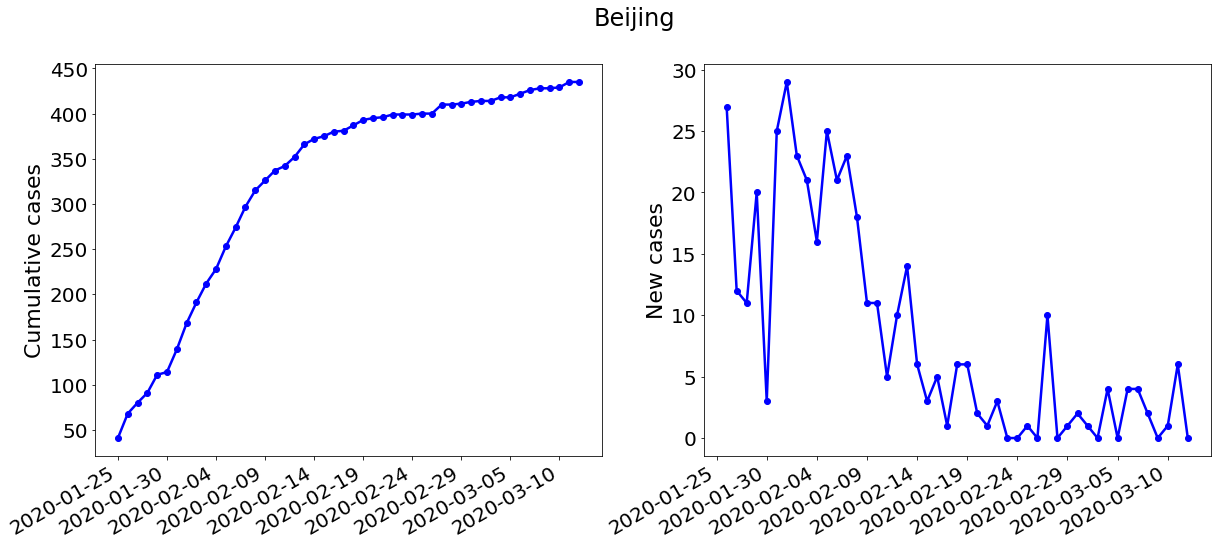

In [15]:
y_label_fs = 22
x_label_fs = 22
legend_fs = 20
y_ticks_fs = 20
x_ticks_fs = 20
title_fs = 24

formatter = mdates.DateFormatter("%Y-%m-%d")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax1.xaxis.set_major_locator(locator)

ax1.plot(date_range_dt, confirmed, '-o', label='Confirmed', color='b', lw = 2.5)
ax2.plot(date_range_dt[1:], confirmed[1:]-confirmed[:-1], '-o', label='Confirmed', color='b', lw = 2.5)

ax1.tick_params(labelsize=x_ticks_fs)
ax2.tick_params(labelsize=x_ticks_fs)

ax1.set_ylabel('Cumulative cases', fontsize=y_label_fs)
ax2.set_ylabel('New cases', fontsize=y_label_fs)

ax1.set_xticks(date_range_dt[::5])
ax2.set_xticks(date_range_dt[::5])

fig.autofmt_xdate()
fig.suptitle(f'{location}', fontsize=title_fs)

plt.show()